In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
data=pd.read_csv('D:\\Users\\KARUNA\\Downloads\\HousePricePrediction.xlsx - Sheet1.csv')

In [50]:
print(data)

        Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond   
0        0          60       RL     8450    Inside     1Fam            5  \
1        1          20       RL     9600       FR2     1Fam            8   
2        2          60       RL    11250    Inside     1Fam            5   
3        3          70       RL     9550    Corner     1Fam            5   
4        4          60       RL    14260       FR2     1Fam            5   
...    ...         ...      ...      ...       ...      ...          ...   
2914  2914         160       RM     1936    Inside    Twnhs            7   
2915  2915         160       RM     1894    Inside   TwnhsE            5   
2916  2916          20       RL    20000    Inside     1Fam            7   
2917  2917          85       RL    10441    Inside     1Fam            5   
2918  2918          60       RL     9627    Inside     1Fam            5   

      YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0      

In [51]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [52]:
data.tail()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


In [53]:
# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(data.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB
None


In [54]:
# Drop rows with NaN in the target variable (SalePrice)
data = data.dropna(subset=['SalePrice'])

In [56]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'])

In [57]:
# Select features and target variable
X = data[['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF',
          'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
          'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
          'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
          'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng']]

In [58]:
y = data['SalePrice']

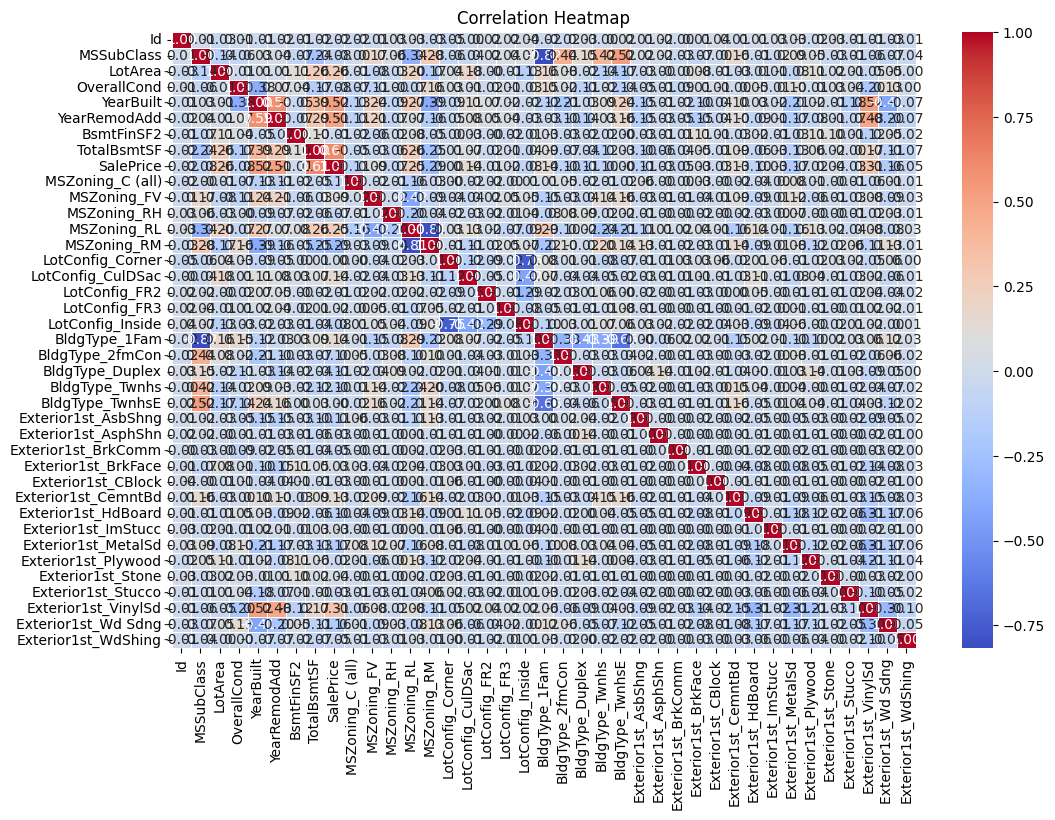

In [59]:
# Display correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [62]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [63]:
# Predict on the test set
y_pred = rf_model.predict(X_test)


In [64]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1416916874.3547015


In [65]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8152729315440268


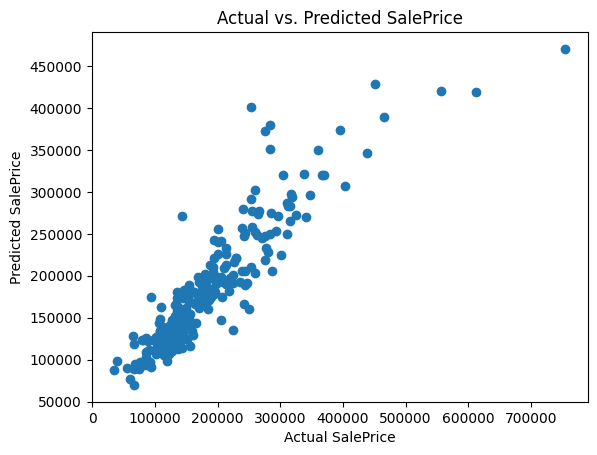

In [66]:
# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice')
plt.show()

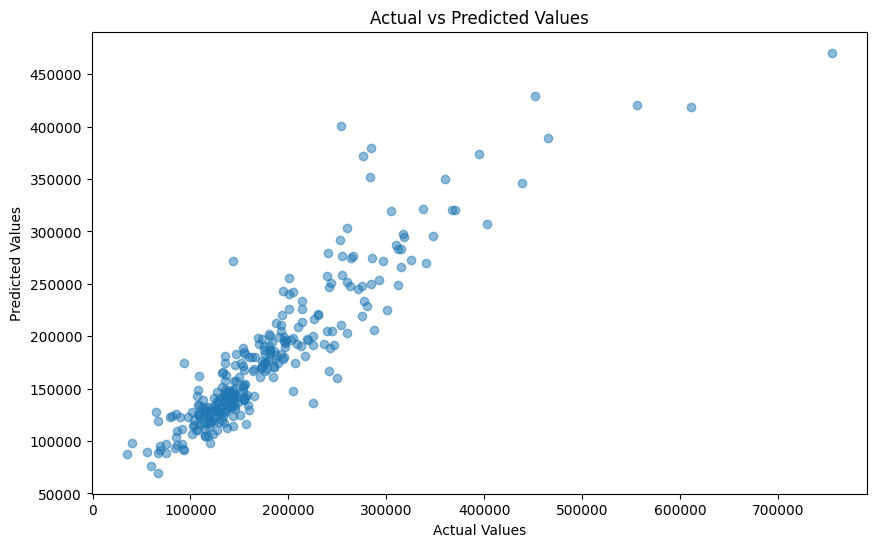

In [67]:
# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

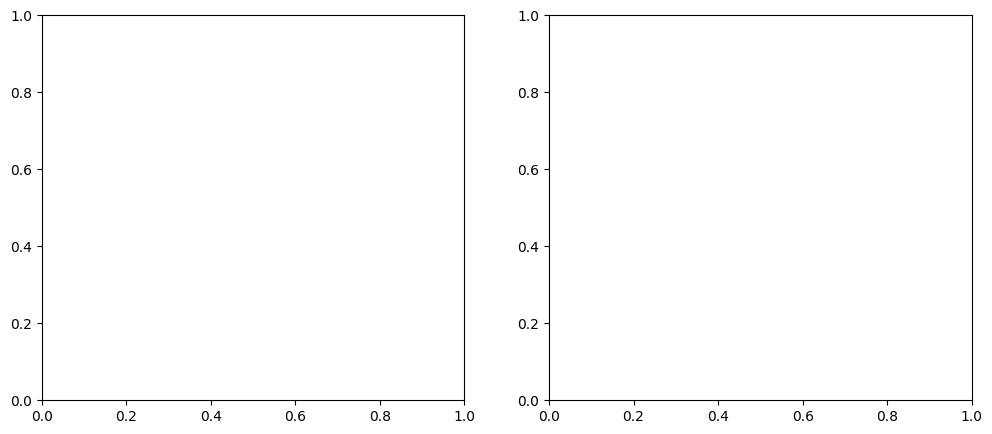

In [68]:
# Plot MSE and R-squared
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

In [69]:
# Plot MSE
axes[0].bar(['MSE'], [mse], color='blue')
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE Value')

Text(4.444444444444466, 0.5, 'MSE Value')

In [70]:
# Plot R-squared
axes[1].bar(['R-squared'], [r2], color='green')
axes[1].set_title('R-squared')
axes[1].set_ylabel('R-squared Value')

Text(511.7171717171717, 0.5, 'R-squared Value')